# intro

Here we will build a greedy reduced basis
of non-spinning time-domain waveforms
demonstrating how to build the basis iteratively through enrichemnt.

This method allows you to split the RB construction of large training sets
up into smaller chuncks to allow you to fit them into memory!

# imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({"font.size": 16})

In [2]:
import numpy as np
import os
import datetime

In [3]:
import rompy as rp

In [4]:
import scrinet.workflow.generators

In [5]:
from scrinet.greedy import greedyrb

# generate train/test data

In [6]:
# here we will generate 5 (or 6) sets of training/testing data

In [7]:
%%time
# generate training and test sets
M = 60
t_min = -1000
# t_min = -10000
npts = 10000

qs = np.array([1, 10])
(
    times,
    ts1_amp,
    ts1_phase,
    _,
    _,
    _,
    coords1,
) = scrinet.workflow.generators.gen_1d_massratio_data(
    qs, M, n_cores=2, t_min=t_min, npts=npts
)

qs = np.random.uniform(1, 10, 10)
(
    _,
    ts2_amp,
    ts2_phase,
    _,
    _,
    _,
    coords2,
) = scrinet.workflow.generators.gen_1d_massratio_data(
    qs, M, n_cores=4, t_min=t_min, npts=npts
)

qs = np.random.uniform(1, 10, 10)
(
    _,
    ts3_amp,
    ts3_phase,
    _,
    _,
    _,
    coords3,
) = scrinet.workflow.generators.gen_1d_massratio_data(
    qs, M, n_cores=4, t_min=t_min, npts=npts
)


qs = np.random.uniform(1, 10, 100)
(
    _,
    ts4_amp,
    ts4_phase,
    _,
    _,
    _,
    coords4,
) = scrinet.workflow.generators.gen_1d_massratio_data(
    qs, M, n_cores=4, t_min=t_min, npts=npts
)


qs = np.random.uniform(10, 20, 100)
(
    _,
    ts5_amp,
    ts5_phase,
    _,
    _,
    _,
    coords5,
) = scrinet.workflow.generators.gen_1d_massratio_data(
    qs, M, n_cores=4, t_min=t_min, npts=npts
)




CPU times: user 253 ms, sys: 193 ms, total: 446 ms
Wall time: 1min 8s


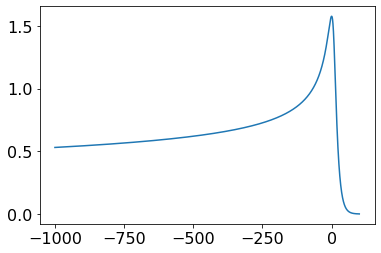

In [8]:
plt.figure()
plt.plot(times, ts1_amp[0])

In [9]:
coords4.shape

(100, 1)

Text(0.5, 0, 'mass-ratio')

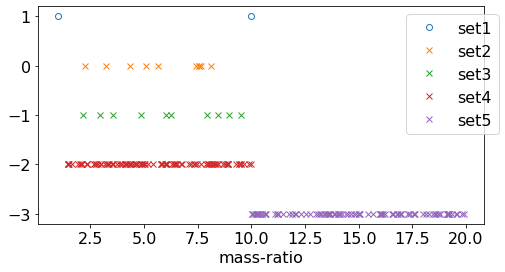

In [10]:
plt.figure(figsize=(8,4))
plt.plot(coords1, np.ones_like(coords1), "o", markerfacecolor="None", label='set1')
plt.plot(coords2, np.ones_like(coords2)-1, "x", label='set2')
plt.plot(coords3, np.ones_like(coords3)-2, "x", label='set3')
plt.plot(coords4, np.ones_like(coords4)-3, "x", label='set4')
plt.plot(coords5, np.ones_like(coords5)-4, "x", label='set5')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mass-ratio")

# construct RB

In [11]:
# first we need to define an integration rule to compute products
integration = rp.Integration([times[0], times[-1]], len(times), rule="trapezoidal")

In [20]:
ts1_amp.shape

(2, 10000)

In [23]:
def normalise_ts(ts, integration):
    return np.array([integration.normalize(t) for t in ts])

In [26]:
# ts1_amp_backup = ts1_amp.copy()
# ts2_amp_backup = ts2_amp.copy()
# ts3_amp_backup = ts3_amp.copy()
# ts4_amp_backup = ts4_amp.copy()
# ts5_amp_backup = ts5_amp.copy()

In [100]:
# ts1_amp = ts1_amp_backup
# ts2_amp = ts2_amp_backup
# ts3_amp = ts3_amp_backup
# ts4_amp = ts4_amp_backup
# ts5_amp = ts5_amp_backup

In [27]:
# ts1_amp = normalise_ts(ts1_amp, integration)
# ts2_amp = normalise_ts(ts2_amp, integration)
# ts3_amp = normalise_ts(ts3_amp, integration)
# ts4_amp = normalise_ts(ts4_amp, integration)
# ts5_amp = normalise_ts(ts5_amp, integration)

In [101]:
# make grb class
grb = greedyrb.NewGreedyReducedBasis(integration)

In [102]:
# our first training set covers the boundary of the space
coords1

array([[ 1],
       [10]])

In [103]:
# plt.figure()
# plt.plot(times, ts1_amp[0])
# plt.plot(times, ts1_amp[1])

In [104]:
# we will use a absolute greedy tol
tol=1e-12

In [105]:
# with grb.make we build the initial basis
grb.make(ts=ts1_amp, tol=tol, seed_index=0)


Step 	 Error
1 	 626.8243313054676
2 	 2.952152086392971


In [106]:
# we can save and load the basis at anytime
# np.save("basis.npy", grb.basis)

# then you can load the basis with 
## grb = GreedyReducedBasis(integration)
# grb.load_basis("basis.npy")



In [107]:
# we can save the greedy points at anytime with
coords1[grb.indices]

# the training set data at the greedy point is:
rb_step1_ts = ts1_amp[grb.indices]

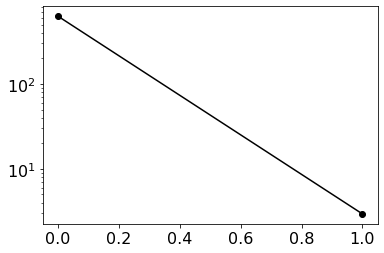

In [108]:
# we can plot the greedy errors so far with
# not very interesting with just two points
plt.figure()
plt.plot(grb.errors, 'k-o')
plt.yscale('log')

In [109]:
# now lets test our current basis against some of our other training/test datasets

Text(0.5, 0, 'mass-ratio')

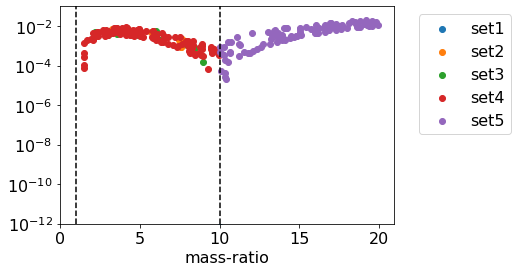

In [110]:
plt.figure()
plt.axvline(coords1[0], ls='--', color='k')
plt.axvline(coords1[1], ls='--', color='k')
plt.scatter(coords1, grb.validate(ts1_amp), label='set1')
plt.scatter(coords2, grb.validate(ts2_amp), label='set2')
plt.scatter(coords3, grb.validate(ts3_amp), label='set3')
plt.scatter(coords4, grb.validate(ts4_amp), label='set4')
plt.scatter(coords5, grb.validate(ts5_amp), label='set5')
plt.yscale('log')
plt.ylim(1e-12, 1e-1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mass-ratio")

In [111]:
# naturally we find that the basis recovers set1 but
# get worse for points away from set1
# we can *enrich* our basis by adding data from other training sets
# to it in a greedy way.

In [112]:
ts2_amp.shape

(10, 10000)

In [113]:
grb.enrich(ts2_amp, tol=tol)


Step 	 Error
0 	 0.006832338301705931
1 	 0.0008790375129592576
2 	 2.9710304261243436e-05
3 	 9.968993595066422e-06
4 	 1.194063543152879e-06
5 	 1.694708089416963e-07
6 	 2.043509539362276e-08
7 	 6.2285607782541774e-09
8 	 5.560991667152848e-09
9 	 1.0195435606874526e-09


In [114]:
# the training set data at the greedy point is:
rb_step2_ts = ts2_amp[grb.indices]

In [115]:
# the size attribute will tell you how large is the RB
grb.size

12

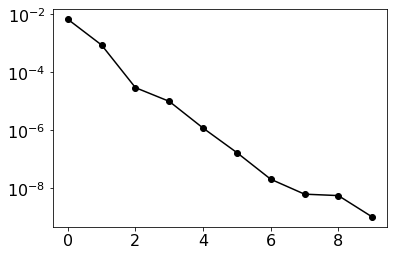

In [116]:
plt.figure()
plt.plot(grb.errors, 'k-o')
plt.yscale('log')

Text(0.5, 0, 'mass-ratio')

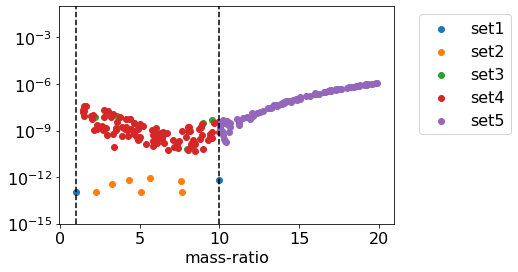

In [117]:
# again we can check the accuracy of the basis via computing the validation error
plt.figure()
plt.axvline(coords1[0], ls='--', color='k')
plt.axvline(coords1[1], ls='--', color='k')
plt.scatter(coords1, grb.validate(ts1_amp), label='set1')
plt.scatter(coords2, grb.validate(ts2_amp), label='set2')
plt.scatter(coords3, grb.validate(ts3_amp), label='set3')
plt.scatter(coords4, grb.validate(ts4_amp), label='set4')
plt.scatter(coords5, grb.validate(ts5_amp), label='set5')
plt.yscale('log')
plt.ylim(1e-15, 1e-1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mass-ratio")

In [118]:
# after we have enriched enough we can perform a final greedy RB by collecting together the
# training set data from the greedy points across all steps.
# This will remove some redundent poitns

In [119]:
final_ts = np.row_stack((rb_step1_ts, rb_step2_ts))

In [120]:
grb_final = greedyrb.NewGreedyReducedBasis(integration)

In [121]:
grb_final.make(final_ts, 1e-12, 0)


Step 	 Error
1 	 626.8243313054676
2 	 2.952152086392971
3 	 0.006832338301705931
4 	 0.0008790375129592576
5 	 2.9710304261243436e-05
6 	 9.968993595066422e-06
7 	 1.194063543152879e-06
8 	 1.694708089416963e-07
9 	 2.043509539362276e-08
10 	 6.2285607782541774e-09
11 	 5.560991667152848e-09
12 	 1.0195435606874526e-09


In [122]:
grb_final.size

12

In [123]:
grb_final.errors

array([6.26824331e+02, 2.95215209e+00, 6.83233830e-03, 8.79037513e-04,
       2.97103043e-05, 9.96899360e-06, 1.19406354e-06, 1.69470809e-07,
       2.04350954e-08, 6.22856078e-09, 5.56099167e-09, 1.01954356e-09])

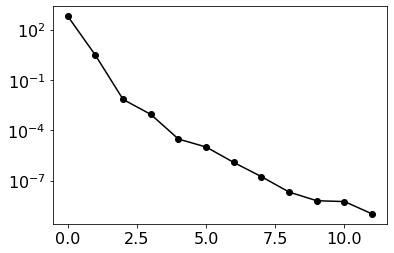

In [124]:
plt.figure()
plt.plot(grb_final.errors, 'k-o')
plt.yscale('log')

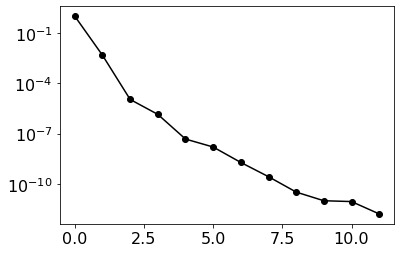

In [125]:
plt.figure()
plt.plot(grb_final.errors/grb_final.errors[0], 'k-o')
plt.yscale('log')

Text(0.5, 0, 'mass-ratio')

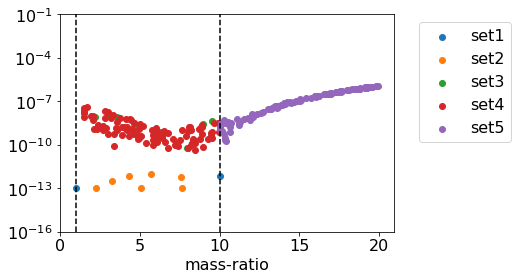

In [126]:
plt.figure()
plt.axvline(coords1[0], ls='--', color='k')
plt.axvline(coords1[1], ls='--', color='k')
plt.scatter(coords1, grb_final.validate(ts1_amp), label='set1')
plt.scatter(coords2, grb_final.validate(ts2_amp), label='set2')
plt.scatter(coords3, grb_final.validate(ts3_amp), label='set3')
plt.scatter(coords4, grb_final.validate(ts4_amp), label='set4')
plt.scatter(coords5, grb_final.validate(ts5_amp), label='set5')
plt.yscale('log')
plt.ylim(1e-16, 1e-1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mass-ratio")

## lets take a look at the alpha (projection) coefficients

In [127]:
alpha_set4 = np.array([grb_final.alpha_arr(b, ts4_amp) for b in grb_final.basis])

In [128]:
def plot_coeff(coords, alphas, index, join=False):
    plt.figure()
    if join:
        plt.plot(coords, alphas[index])
    else:
        plt.scatter(coords, alphas[index])
    plt.xlabel("mass-ratio")
    plt.title(f"alpha coeff: {index}")
    plt.show()
    plt.close

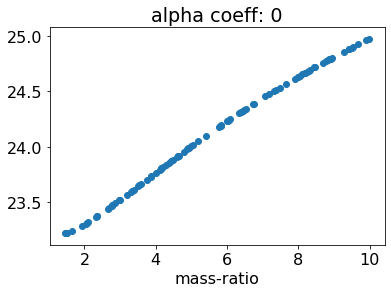

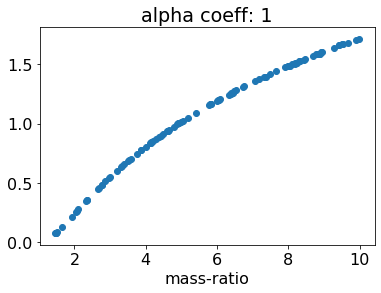

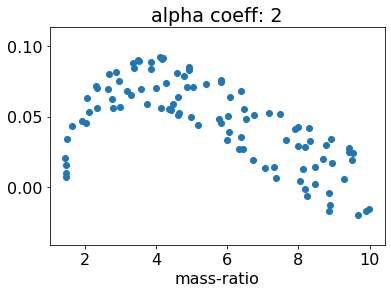

In [129]:
plot_coeff(coords4, alpha_set4, 0)
plot_coeff(coords4, alpha_set4, 1)
plot_coeff(coords4, alpha_set4, 2)

In [59]:
# coeffs 0 and 1 look nice and smooth but coeff 2 is more difficult to tell..
# lets generate a super dense training set and compute coeffs to get a better idea

In [60]:
%%time
# qs = np.random.uniform(1, 20, 1000)
qs = np.linspace(1, 20, 1000)
(
    _,
    ts6_amp,
    ts6_phase,
    _,
    _,
    _,
    coords6,
) = scrinet.workflow.generators.gen_1d_massratio_data(
    qs, M, n_cores=4, t_min=t_min, npts=npts
)

CPU times: user 1.2 s, sys: 819 ms, total: 2.02 s
Wall time: 5min 7s


In [62]:
alpha_set6 = np.array([grb_final.alpha_arr(b, ts6_amp) for b in grb_final.basis])

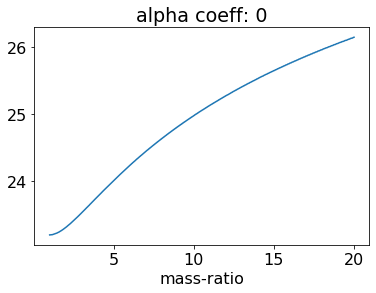

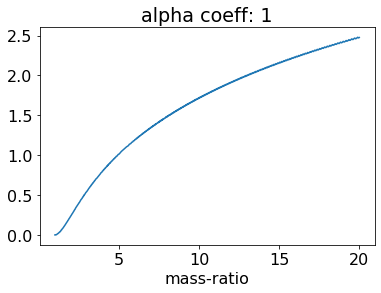

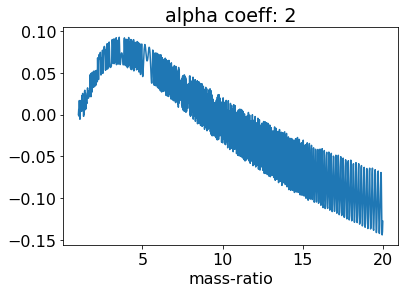

In [63]:
plot_coeff(coords6, alpha_set6, 0, join=True)
plot_coeff(coords6, alpha_set6, 1, join=True)
plot_coeff(coords6, alpha_set6, 2, join=True)

In [64]:
# we see that coeff 2 is a highly oscillatory function
# and probably going to be difficult to model

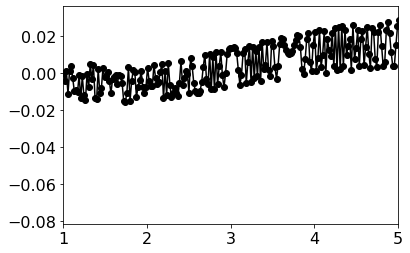

In [65]:
plt.figure()
plt.plot(coords6, alpha_set6[3], 'k-o')
plt.xlim(1, 5)
plt.show()
plt.close()

# construct empirical interpolation

In [66]:
len(times)-1

9999

In [67]:
eim = rp.EmpiricalInterpolant(grb_final.basis, verbose=True)

('\nStep', '\t', 'Nodes')
(1, '\t', 9090)
(2, '\t', 3029)
(3, '\t', 9260)
(4, '\t', 8519)
(5, '\t', 9053)
(6, '\t', 9165)
(7, '\t', 8969)
(8, '\t', 9394)
(9, '\t', 9136)
(10, '\t', 8827)
(11, '\t', 9119)
(12, '\t', 9106)


In [94]:
eim.make_data(ts6_amp)

In [95]:
eim.data.shape

(12, 1000)

In [96]:
eim.indices[5]

9165

In [97]:
times[8968]

-13.421342134213432

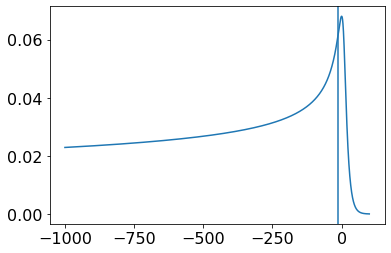

In [98]:
plt.figure()
plt.plot(times, ts1_amp[0])
plt.axvline(times[8968])

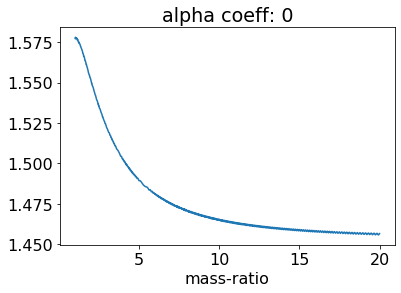

In [99]:
plot_coeff(coords6, eim.data, 0, join=True)